# Importing Necessory Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from pandas_profiling import ProfileReport

# Loading Data

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Information

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data balance check

In [5]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### conclusion : Imbalanced

## Data balancing

In [6]:
d_majority=data[data.Outcome==0]
d_minority=data[data.Outcome==1]

d_upsampled_minority=resample(d_minority, replace=True,     # sample with replacement
                      n_samples=500,    # to match majority class
                      random_state=123)
data=pd.concat([d_majority,d_upsampled_minority])
data.Outcome.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

# Splitting Dependent-Independent Variables

In [7]:
X=data
X=X.drop(['Outcome'],axis=1)
y=data['Outcome']

# Data Quality Check

In [8]:
X.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# Exploratory Data Analysis

## Boxplots

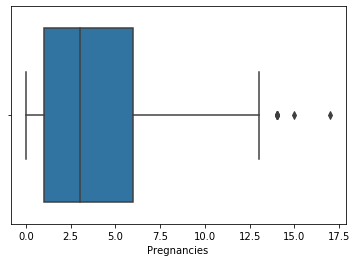

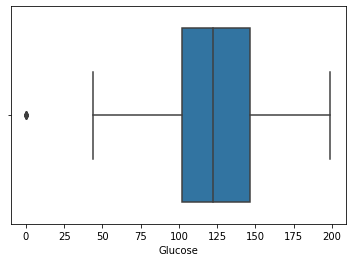

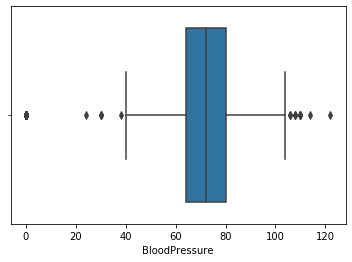

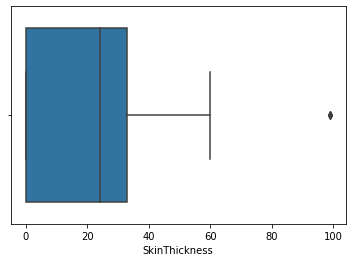

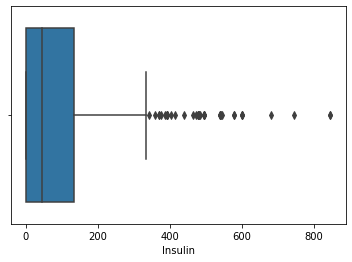

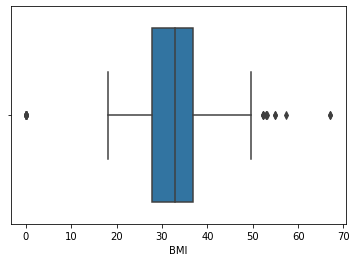

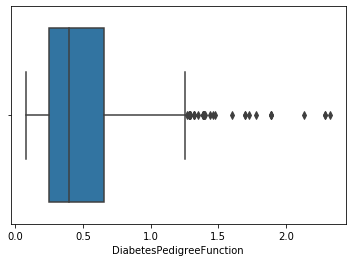

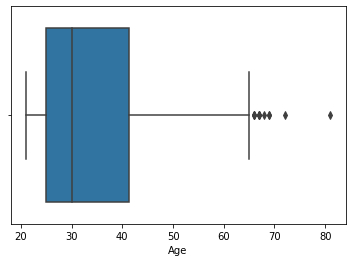

In [9]:
for i in X.columns:
    sns.boxplot(X[i])
    plt.show()

# Histograms

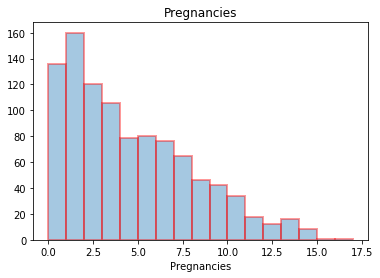

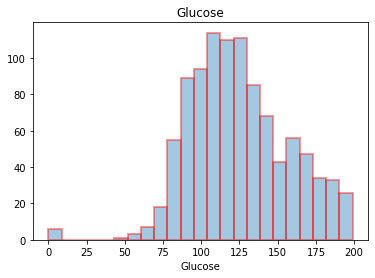

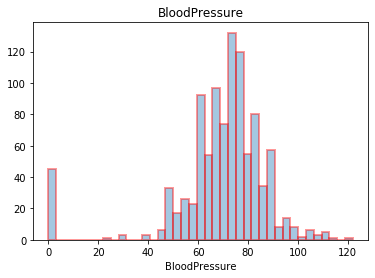

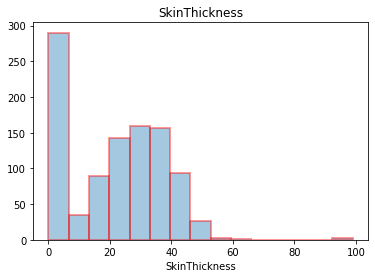

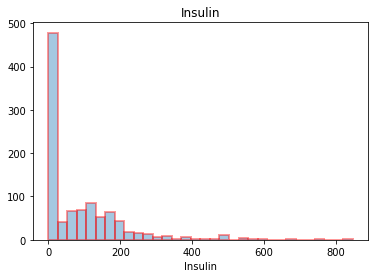

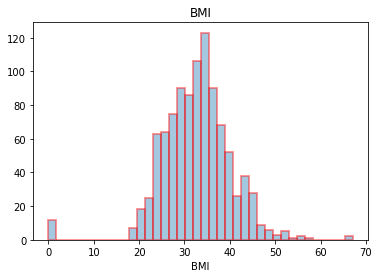

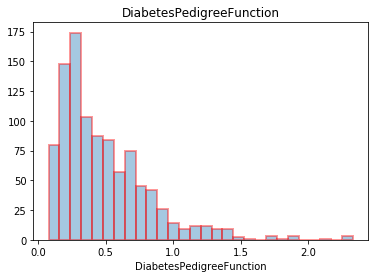

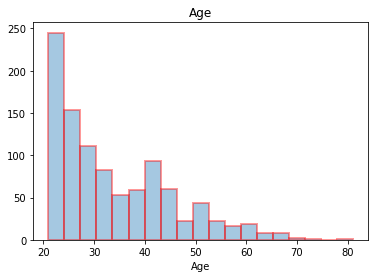

In [10]:
for i in X.columns:
    sns.distplot(X[i],kde=False,hist_kws=dict(edgecolor="r", linewidth=2))
    plt.title(i)
    plt.show()

## Jointplot

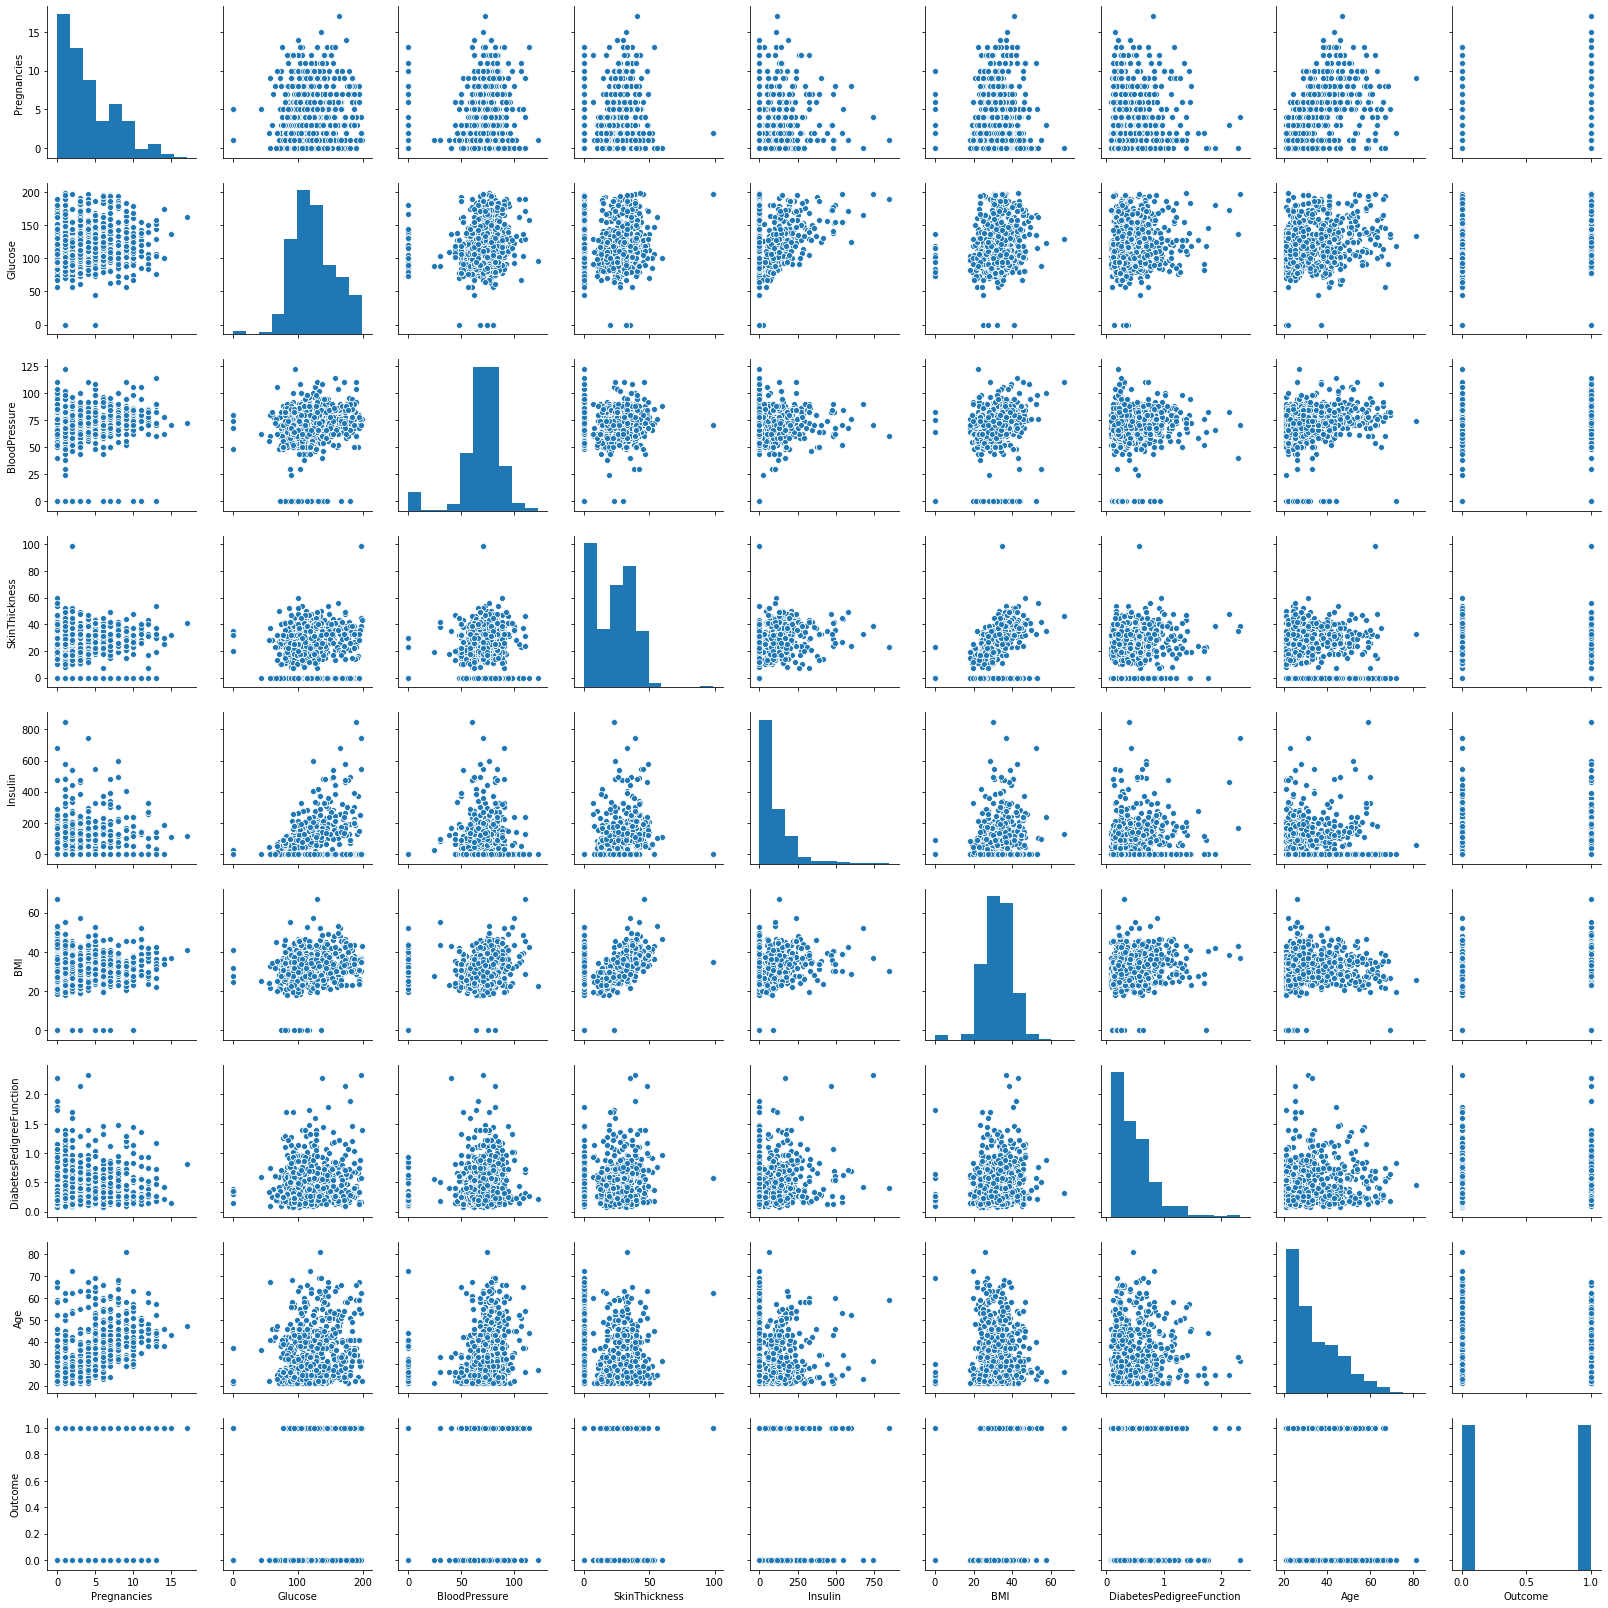

In [11]:
sns.pairplot(data)
plt.show()

In [12]:
profile = ProfileReport(data)
profile

C:\Users\Raj\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,78.2 KiB
Average record size in memory,80.1 B
Numeric,9
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


# Modelling

## Without any feature engineering

In [13]:
# splitting into training and testing data in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3, random_state=42)

#initialling random forest classifier
clf = RandomForestClassifier(random_state=0)

#fitting the data
clf.fit(X_train,y_train)

#predicting and evaluating
print('Model Accuracy :',clf.score(X_test,y_test))

Model Accuracy : 0.8633333333333333


## Computing Z score and removal of outliers

In [14]:
Zscore = np.abs(stats.zscore(X))

X1=pd.DataFrame(X[(Zscore < 3).all(axis=1)])
y1=y[(Zscore < 3).all(axis=1)]
X1.shape

(900, 8)

In [15]:
y1.value_counts()

0    462
1    438
Name: Outcome, dtype: int64

# Fitting and Predicting 

In [16]:
# splitting into training and testing data in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X1,y1,stratify=y1,test_size=0.3, random_state=42)

#initialling random forest classifier
clf = RandomForestClassifier(random_state=0)

#fitting the data
clf.fit(X_train,y_train)

#predicting and evaluating
print('Model Accuracy :',clf.score(X_test,y_test))

Model Accuracy : 0.8925925925925926
